#Домашнее задание № 13

#Алгоритмы кластеризации



In [5]:
# установим библиотеку
!pip install opencv-python

In [6]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

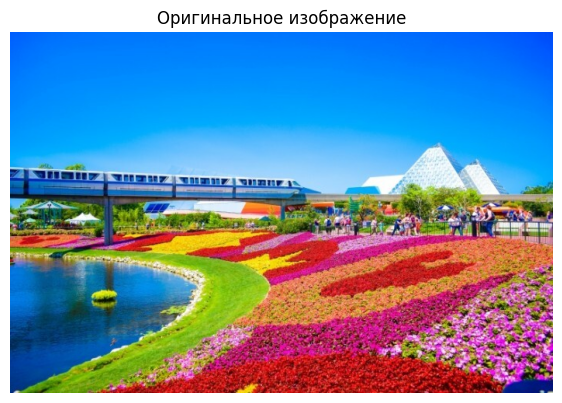

In [7]:
# посмотрим на нашу картинку
img = cv2.imread('/content/feml.jpeg')
draw_picture(img, 'Оригинальное изображение', bgr=True)

#2. Реализуем 3 модели кластеризации

a) KMeans. Число кластеров K = 2, 5, 10, 20

In [8]:
# загрузим библиотеки
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
# посмотрим размер нашего изображения
img.shape

(466, 700, 3)

In [10]:
466*700

326200

In [11]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

K=2

In [11]:
# построим модель с 2 кластерами
km = KMeans(n_clusters=2)

In [12]:
# обучим модель
km.fit(reshaped_img)
km

KMeans(n_clusters=2)

In [13]:
# получим предсказания
target = km.fit_predict(reshaped_img)
target

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
# найдем расположение центроидов (центров кластеров)
color_space = km.cluster_centers_
color_space

array([[235.09445789, 145.42921897,  33.1099484 ],
       [ 73.8586299 , 102.28325352, 163.55711139]])

In [15]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3)
                         )

In [16]:
# проверим размер
output_image.shape

(466, 700, 3)

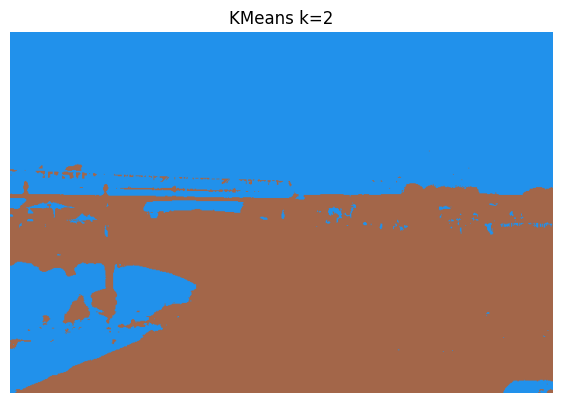

In [17]:
draw_picture(output_image, 'KMeans k=2', bgr=True)

k=5

In [18]:
# для дальнейших операций напишем маленькубю функцию
def KM_k(original_image=img, k=2):

  original_image = img
  reshaped_img = np.reshape(original_image,
	                          ((original_image.shape[0] * original_image.shape[1]),
                            3)
                           )

  km_ = KMeans(n_clusters=k)
  target_ = km_.fit_predict(reshaped_img)
  color_space_ = km_.cluster_centers_
  output_image_ = np.reshape(color_space_.astype('uint8')[target_],
                             (original_image.shape[0], original_image.shape[1], 3)
                            )
  draw_picture(output_image_, 'KMeans k={}'.format(k), bgr=True)

  return

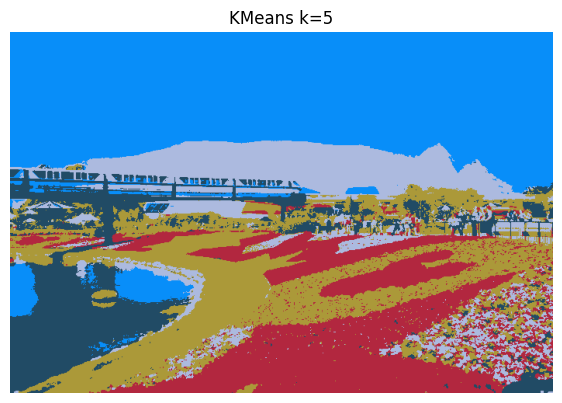

In [19]:
# посмотрим
KM_k(k=5)

k=10

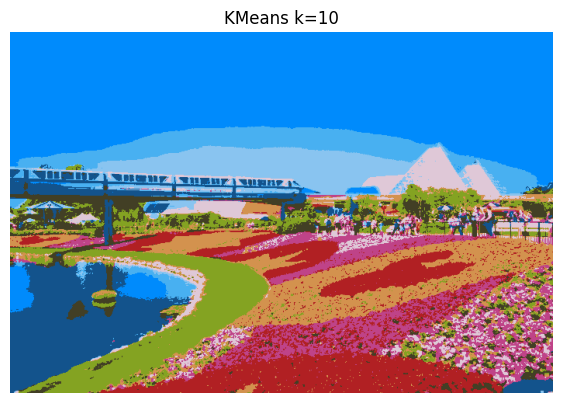

In [20]:
# посмотрим
KM_k(k=10)

k=20

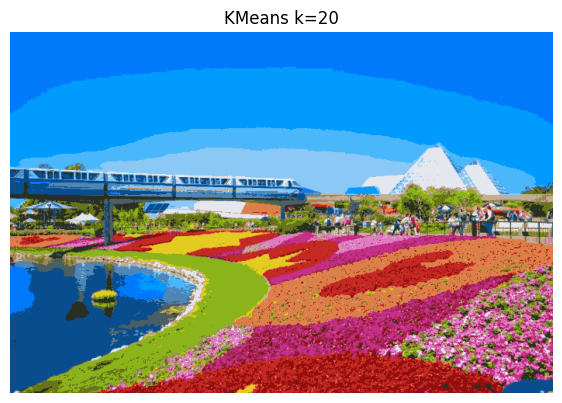

In [21]:
# посмотрим
KM_k(k=20)

b) DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
import cv2

In [ ]:
# Преобразование RGB-изображения в одномерный массив
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )

In [13]:
# Создим объект DBSCAN
dbscan = DBSCAN(eps=10, min_samples=40, metric='euclidean')

In [1]:
# обучим модель
dbscan.fit(reshaped_img)
dbscan

NameError: name 'dbscan' is not defined

In [ ]:
# Получим предсказания
labels = dbscan.fit_predict(reshaped_img)
labels

In [ ]:
unique_elements = np.unique(labels)
unique_elements

In [ ]:
len(labels)

In [ ]:
ans = dbscan.labels_

In [ ]:
len(ans)

In [ ]:
listlab=list(set(ans))

In [ ]:
#list of different colors to differentiate between different clusters as there might be many clusters form as a result of the DBSCAN algorithm
colors = ["red","green","blue","yellow","black","orange","purple","brown","gray","magenta"]
fig, ax = plt.subplots()
centroids=[]
#plot scatter plot with outliers (with -1 label), with respect to each label one by one in a loop
for i in range(len(listlab)):
        #points corresponding to a cluster label are placed in the points array and plotted in each iteration
        points = np.array([X[j] for j in range(len(X)) if labels[j] == listlab[i]])
        #centroids for these points are generated by taking the mean of the points array in each iteration
        centroids.append(list(np.mean(points, axis=0)))
        ax.scatter(points[:,0], points[:,1], s=10, c=colors[i])

#centroids of the newly formed clusters are plotted as asterisks
centroids=np.array(centroids)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black')
plt.show()

In [ ]:
# Преобразум метки в изображение
# Преобразование меток в изображение
output_image = labels.reshape(img.shape[0], img.shape[1])

In [ ]:
draw_picture(output_image, 'DBSCAN(eps=3, min_samples=10)', bgr=True)

c) AgglomerativeClustering. Число кластеров K = 2, 5, 10, 20.